# Lead Scoring Case Study

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

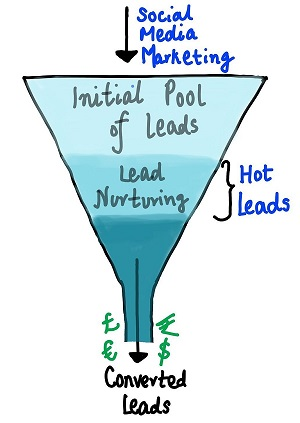


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals
There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Importing Libraries

In [150]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

# Reading the Dataset

In [151]:
#import dataset
leads= pd.read_csv('Leads.csv')
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [152]:
leads.shape

(9240, 37)

In [153]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- We can see some values missing, which we will treat later.
- The data types of the variables are in correct format.

In [154]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

- Looking at the describe table we can sense there are outliers in the data which we have to handle.

# Data Cleaning

- We can see there is a value `Select` in many columns. So it is due to the students who have visited have not selected any options. So they can be replaced to `NaN` values. 

In [155]:
# Replacing "Select" with NaN
leads.replace("Select", np.nan, inplace= True)

In [156]:
round(100*leads.isnull().sum()/len(leads),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [157]:
# droping columns having null values more than 40%

leads= leads.drop(columns=['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index',
                          'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [158]:
round(100*leads.isnull().sum()/len(leads),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### - Working on 'Country' column

In [159]:
leads['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Nigeria                  0.059006
South Africa             0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
Netherlands              0.029503
Asia/Pacific Region      0.029503
Bangladesh               0.029503
Uganda                   0.029503
Ghana                    0.029503
China                    0.029503
Philippines              0.029503
Italy                    0.029503
Belgium                  0.029503
Vietnam                  0.014751
Denmark       

- Most of the Students are from India. So they are highly skewed and will not be helpful. So we can drop the column.

In [160]:
#Droping the column country
leads.drop(columns= ["Country"], axis=1, inplace=True)

#### - Wroking with 'Specialzation' Column

In [161]:
leads['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

- As we can see there are 36% null values and we have the highest percentage of specialization around 16%. And also we have converted the "Select' feilds to null values, So we will replace the null values as `Not Mentioned`.

In [162]:
# replacing null values with "Not Mentioned"
leads.Specialization.replace(np.nan, "Not Mentioned", inplace=True)

In [163]:
leads["What is your current occupation"].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [164]:
# replacing null values with "Not Mentioned"
leads["What is your current occupation"].replace(np.nan, "Not Mentioned", inplace=True)

#### - Working with 'What matters most to you in choosing a course' column

In [165]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

- The value is highly skewed. So we can drop the column.

In [166]:
#Droping the column 'What matters most to you in choosing a course'
leads.drop(columns= ["What matters most to you in choosing a course"], axis=1, inplace=True)

#### - Working with 'Tags' column

In [167]:
leads['Tags'].value_counts(normalize=True, dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

- Looking at the feilds, we cannot find any inference that the entries would be helpful in the modling. So we can drop the column.

In [168]:
# Droping the column Tags
leads.drop(columns= ["Tags"], axis=1, inplace=True)

#### - Working with 'City' Column

- As we have dropped the 'Country' Column, the `City` column also looks less significant. So we can drop the column.

In [169]:
#Droping the column "City"
leads.drop(columns= ["City"], axis=1, inplace=True)

In [170]:
# Droping the rows having less than 2% of missing values.
leads.dropna(axis=0, inplace=True)

# EDA

In [171]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Working on Categorical Columns

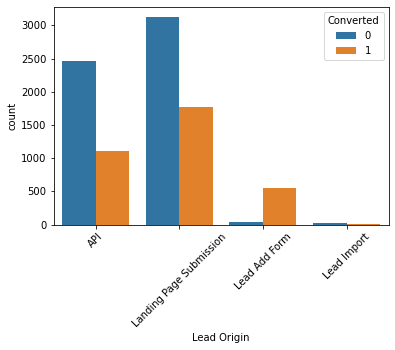

In [172]:
sns.countplot(x= 'Lead Origin', data= leads, hue= 'Converted')
plt.xticks(rotation= 45)
plt.show()

#### Inferences:
- 'Lead Add Form' has better conversion rate than others types. And 'Lead Import' is very less.
- So the focus should be more on `API` and `Landing Page Submission`.

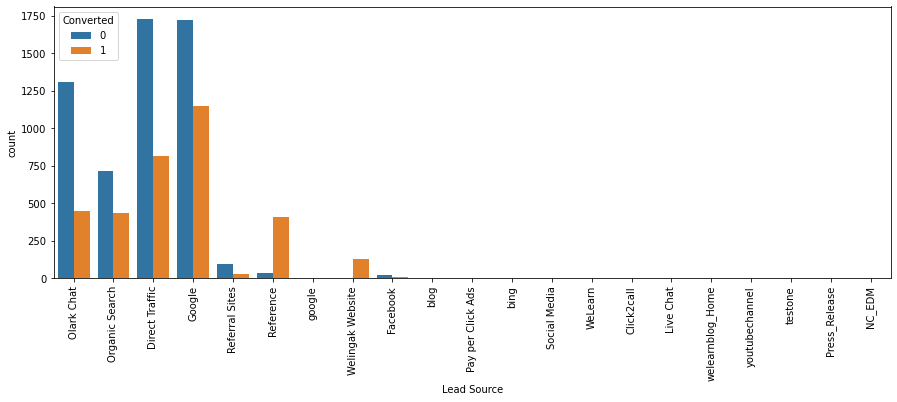

In [173]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Lead Source', data= leads, hue= 'Converted')
plt.xticks(rotation= 90)
plt.show()

- Also we can see there are feilds having 'Google' and 'google' and both are same. So we can replace one with another.
- Also there are many feilds which are less in numbers. So we can replace them as `Others`.

In [174]:
# Replacing "google" with "Google"
leads['Lead Source']= leads['Lead Source'].replace(["google"], "Google")

# Replacing the feilds with less values with "Others"
leads['Lead Source']= leads['Lead Source'].replace(['Facebook', 'blog', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
                                                   'welearnblog_Home', 'youtubechannel', 'Pay per Click Ads', 'bing',
                                                    'testone', 'Press_Release', 'NC_EDM'], 'Others_Source')

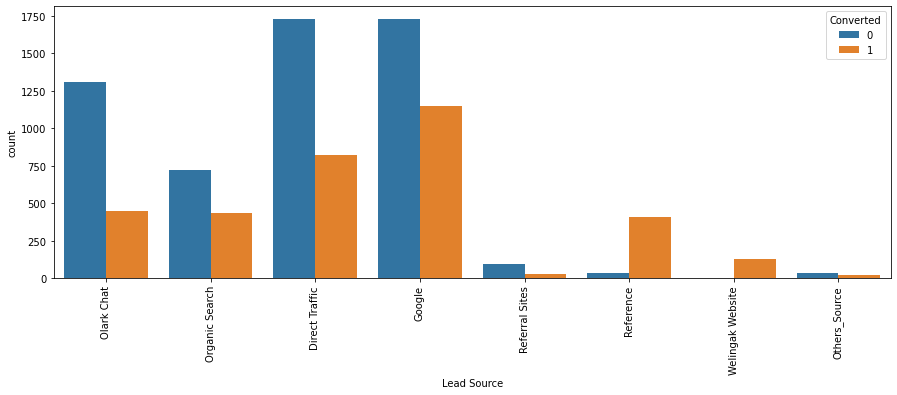

In [175]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Lead Source', data= leads, hue= 'Converted')
plt.xticks(rotation= 90)
plt.show()

#### Inferences:
- The Students joining through 'Reference' and 'Welingak Website' has high converting percentage than the others.
- The conversion rates of "Olark Chat" and "Direct Traffic" is very less. So we have to focus more on it.

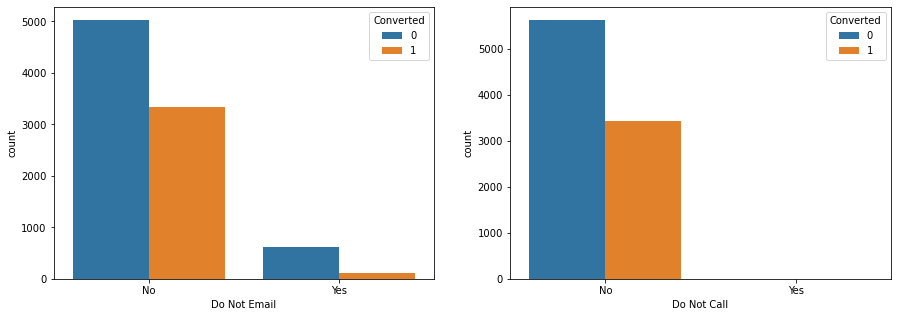

In [176]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x= 'Do Not Email', data= leads, hue= 'Converted')

plt.subplot(1,2,2)
sns.countplot(x= 'Do Not Call', data= leads, hue= 'Converted')
plt.show()

#### Inference:
- Both have most of the values as "No". So we cannot infer much from it. And they are highly Skewed. So we can drop these columns.

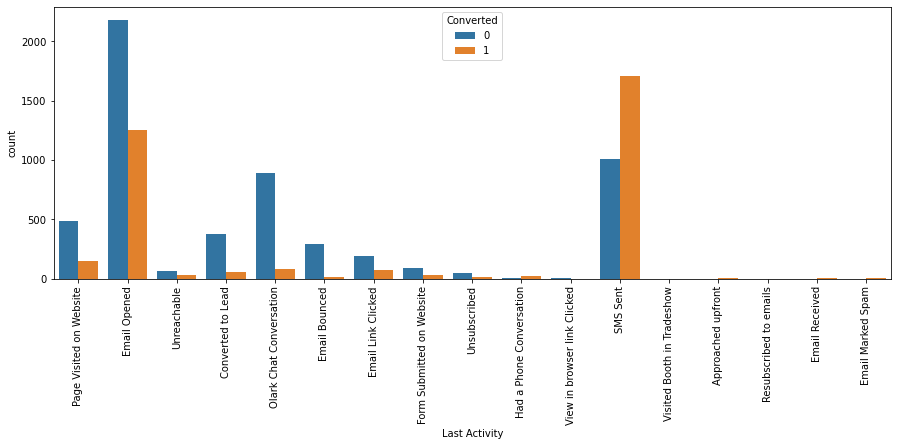

In [177]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Last Activity', data= leads, hue= 'Converted')
plt.xticks(rotation= 90)
plt.show()

In [178]:
# Replacing the feilds with less values with "Others"
leads['Last Activity']= leads['Last Activity'].replace(['Visited Booth in Tradeshow', 'Resubscribed to emails', 'Email Received', 
                                                    'Email Marked Spam', 'Approached upfront', 'View in browser link Clicked',
                                                   'Had a Phone Conversation'], 'Others_Activity')

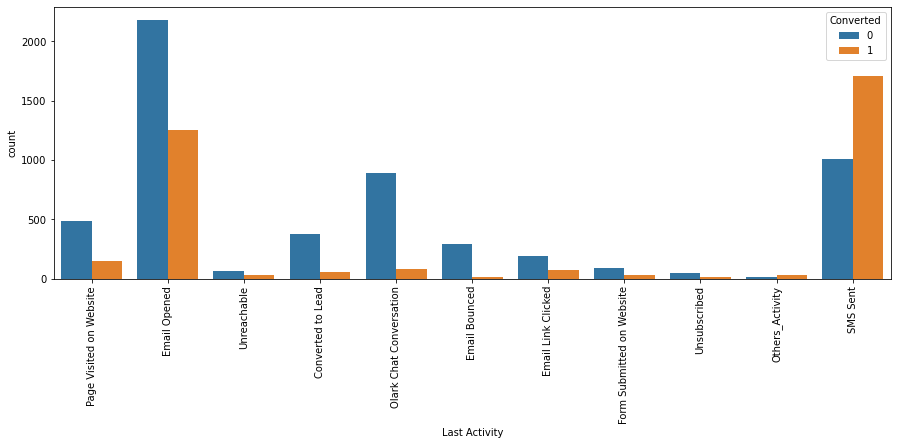

In [179]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Last Activity', data= leads, hue= 'Converted')
plt.xticks(rotation= 90)
plt.show()

- This value of this column is taken by the sales team, i.e it is not not from the lead form. And we want to build a model that help the sales team to contact directly through the original data. SO we will drop this column.

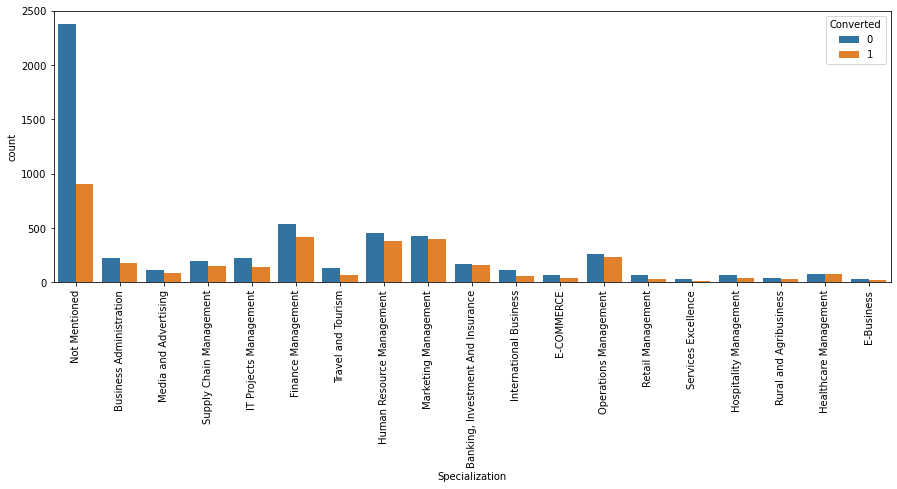

In [180]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Specialization', data= leads, hue= 'Converted')
plt.xticks(rotation= 90)
plt.show()

- There are some similar types of courses. So to minimise the column count later we can group them and make it into one.

In [181]:
# function for clustering the 'Specialisation' Column
def Spec_Cluster(x):
    cluster= ""
    if x in ['Finance Management', 'Human Resource Management', 'Marketing Management', 'Operations Management', 
             'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management',
            'Retail Management']:
        cluster= "Management Specialisation"
    elif x in ['Business Administration', 'International Business', 'Rural and Agribusiness', 'E-Business']:
        cluster= 'Business Specialisation'
    elif x in ['Banking, Investment And Insurance', 'Travel and Tourism', 'Media and Advertising', 'E-COMMERCE', 
               'Services Excellence']:
        cluster= "Industry Specialisation"
    else:
        cluster= 'Not Mentioned'
    return cluster

# Usig the above function to cluster
leads["Specialization"]= leads.apply(lambda x: Spec_Cluster(x["Specialization"]), axis=1)

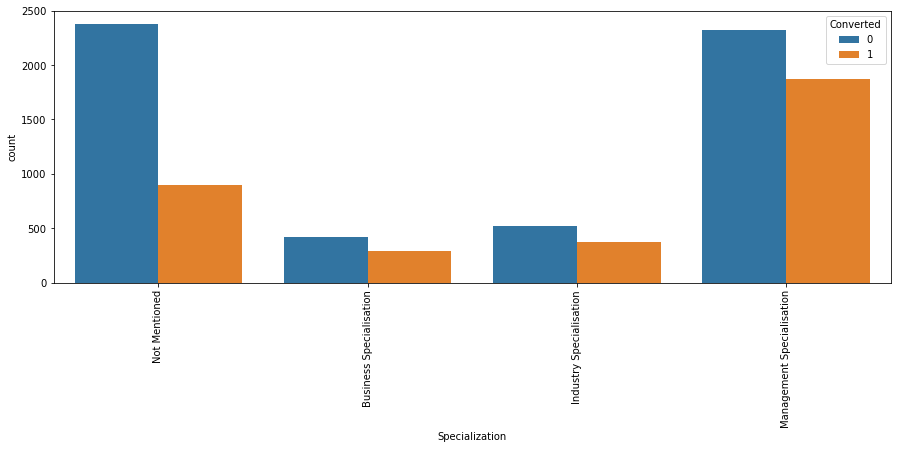

In [182]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Specialization', data= leads, hue= 'Converted')
plt.xticks(rotation= 90)
plt.show()

#### Inferences:
- More Students are looking for "Management Specialisation" and also have more conversion rate.
- Students coming to visit normally ('Not Mentioned' Category) have a lower conversion rate.

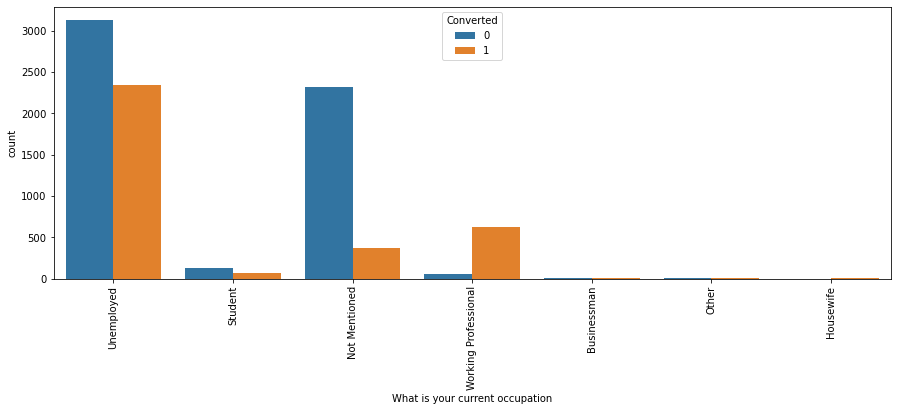

In [183]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'What is your current occupation', data= leads, hue= 'Converted')
plt.xticks(rotation= 90)
plt.show()

#### Inferences:
- Working Professionals have high chances of conversion.
- Unemployed have high number of leads.

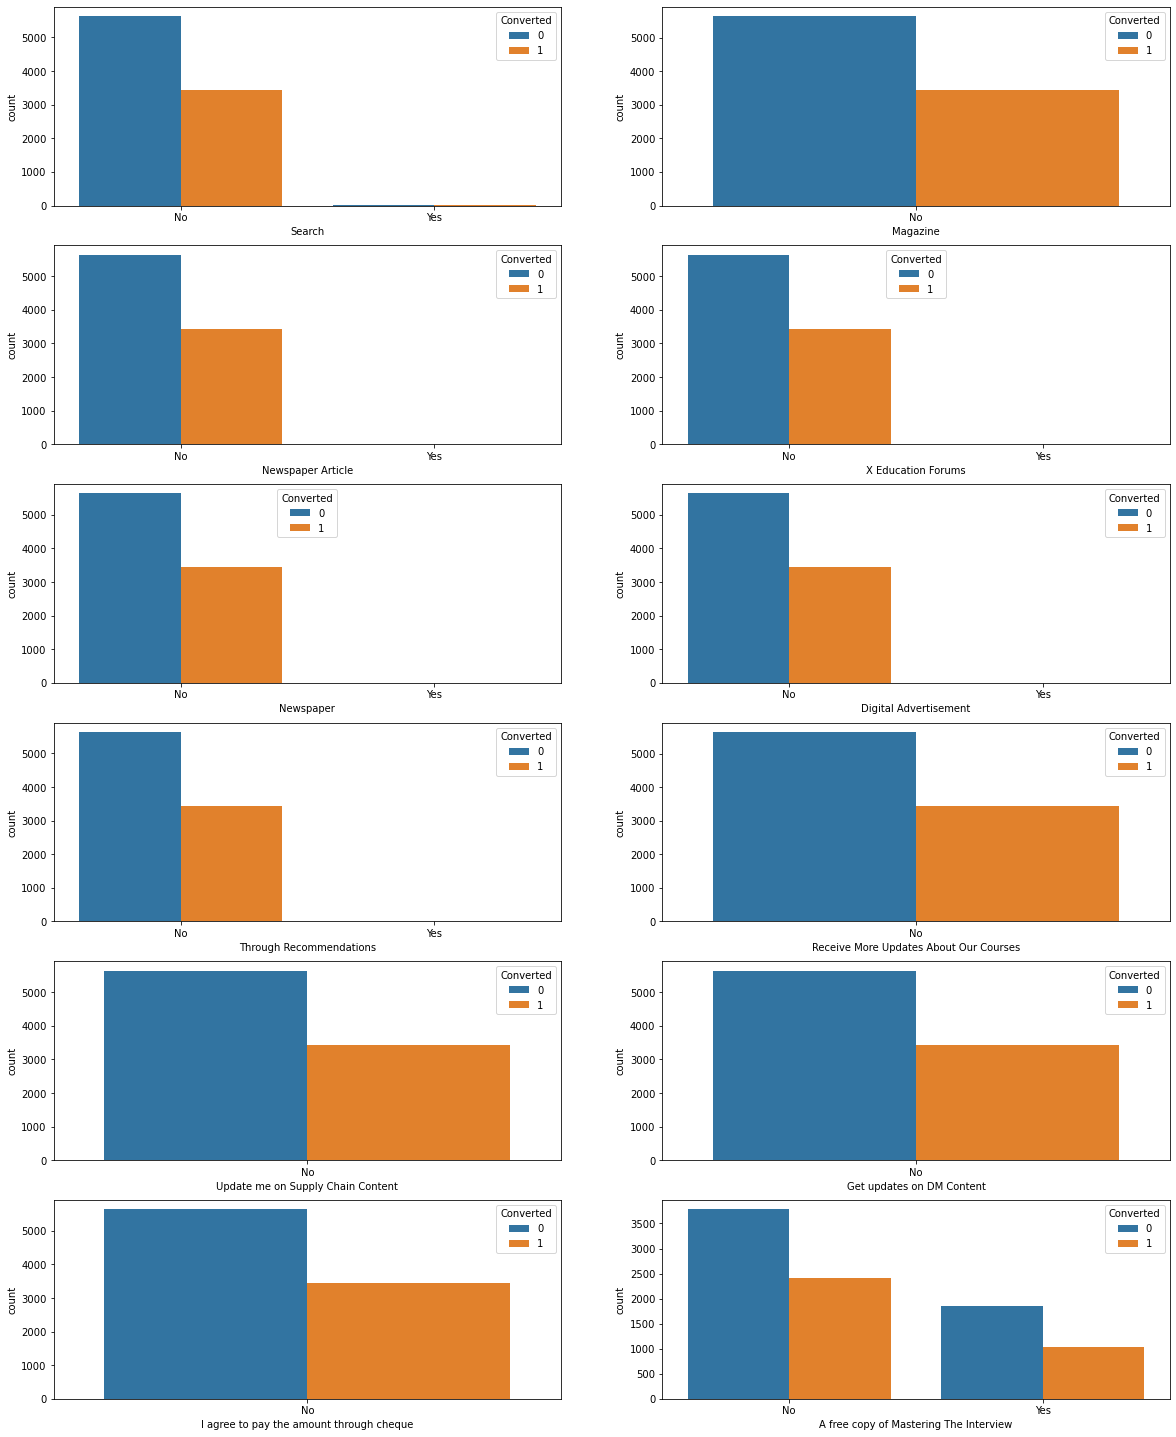

In [184]:
plt.figure(figsize=(20,30))
plt.subplot(7,2,1)
sns.countplot(x= 'Search', data= leads, hue= 'Converted')

plt.subplot(7,2,2)
sns.countplot(x= 'Magazine', data= leads, hue= 'Converted')

plt.subplot(7,2,3)
sns.countplot(x= 'Newspaper Article', data= leads, hue= 'Converted')

plt.subplot(7,2,4)
sns.countplot(x= 'X Education Forums', data= leads, hue= 'Converted')

plt.subplot(7,2,5)
sns.countplot(x= 'Newspaper', data= leads, hue= 'Converted')

plt.subplot(7,2,6)
sns.countplot(x= 'Digital Advertisement', data= leads, hue= 'Converted')

plt.subplot(7,2,7)
sns.countplot(x= 'Through Recommendations', data= leads, hue= 'Converted')

plt.subplot(7,2,8)
sns.countplot(x= 'Receive More Updates About Our Courses', data= leads, hue= 'Converted')

plt.subplot(7,2,9)
sns.countplot(x= 'Update me on Supply Chain Content', data= leads, hue= 'Converted')

plt.subplot(7,2,10)
sns.countplot(x= 'Get updates on DM Content', data= leads, hue= 'Converted')

plt.subplot(7,2,11)
sns.countplot(x= 'I agree to pay the amount through cheque', data= leads, hue= 'Converted')

plt.subplot(7,2,12)
sns.countplot(x= 'A free copy of Mastering The Interview', data= leads, hue= 'Converted')
plt.show()

- All have most of the values as 'No' in all the feilds, and not adding much information to the model. So we can drop these columns.

In [185]:
#Droping the columns
leads.drop(columns= ['Do Not Email', 'Do Not Call', 'Last Activity', 'Search', 'Magazine', 'Newspaper Article', 
                     'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 
                     'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                     'Get updates on DM Content', 'I agree to pay the amount through cheque',
                     'A free copy of Mastering The Interview'], axis=1, inplace=True)

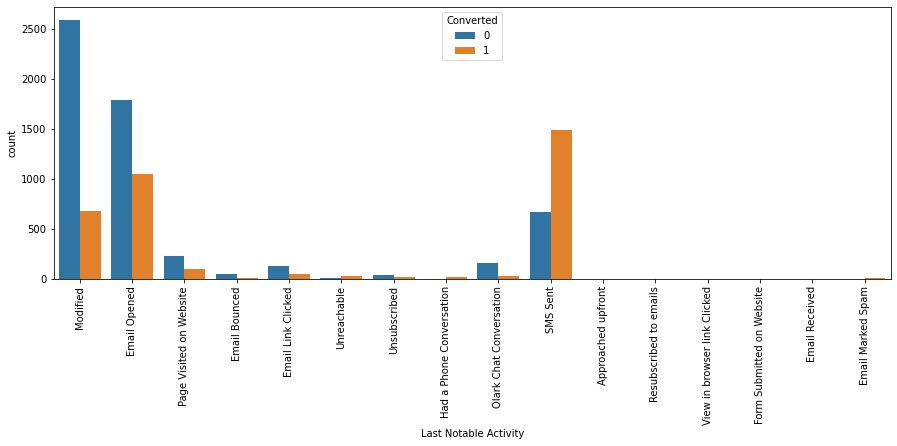

In [186]:
plt.figure(figsize=(15,5))
sns.countplot(x= 'Last Notable Activity', data= leads, hue= 'Converted')
plt.xticks(rotation= 90)
plt.show()

- This column is same as 'Last Activity' column. So we can drop ths column.

In [187]:
# droping the 'Last Notable Activity' column
leads.drop(columns=['Last Notable Activity'], axis=1, inplace=True)

### Working on Numerical Columns

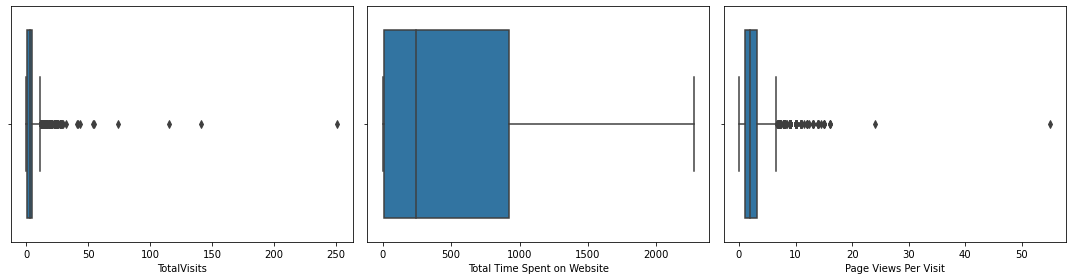

In [188]:
# putting the numerical columns into one variable
num_var= ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# define a function for boxplot
def box_plt(var2):
    plt.figure(figsize=(15,4))
    for i in range(0,len(var2)):
        plt.subplot(1,3,i+1)
        sns.boxplot(leads[var2[i]])
    plt.tight_layout()
    plt.show()
    
box_plt(num_var)

- As we can see the columns 'TotalVisits' and 'Page Views Per Visit' have large outliers. So we have to handle them.

In [189]:
leads["TotalVisits"].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [190]:
leads["Page Views Per Visit"].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

- So we will take the values upto 99 percentile.

In [191]:
# keeping the rows upto 99percentile of the above two columns
leads= leads[leads["TotalVisits"] < np.percentile(leads["TotalVisits"], 99)]
leads= leads[leads["Page Views Per Visit"] < np.percentile(leads["Page Views Per Visit"], 99)]

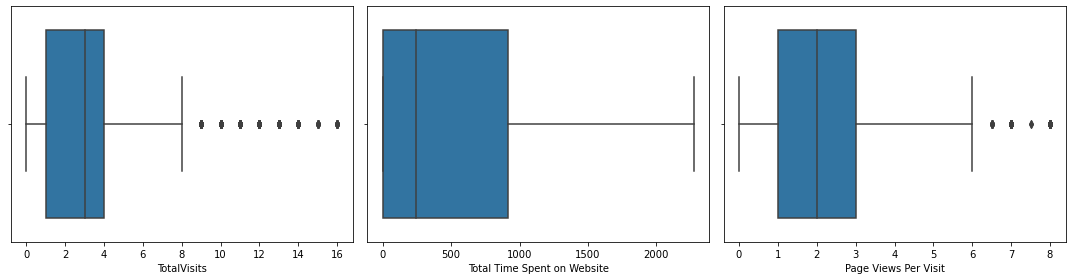

In [192]:
def box_plt(var2):
    plt.figure(figsize=(15,4))
    for i in range(0,len(var2)):
        plt.subplot(1,3,i+1)
        sns.boxplot(leads[var2[i]])
    plt.tight_layout()
    plt.show()
    
box_plt(num_var)

- Now we do not see much of a outliers and we are good to go.

In [193]:
# Final Checks
leads.isna().sum()

Prospect ID                        0
Lead Number                        0
Lead Origin                        0
Lead Source                        0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Specialization                     0
What is your current occupation    0
dtype: int64

In [194]:
leads.shape

(8863, 10)

In [195]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'What is your current occupation'],
      dtype='object')

In [196]:
# num of Retained rows 
8863/9240

0.9591991341991342

- We do not have any null values.
- We treated the outliers.
- We got some inferences from the EDA we performed.
- We removed some extra columns which were not necessary.
- Finally we are left with 8863 number of rows which is around 96% of the whole data. 
- So now we are good to go for Data Preparation for our Model Building.

# Data Preparation

#### Converting the binary variables (Yes/No) with 0/1

In [197]:
#list of variables to map
#var_list= ['Converted']

leads['Converted']= leads['Converted'].replace('Yes', 1)
leads['Converted']= leads['Converted'].replace('No', 0)

In [198]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0          0.0                            0   
1  Organic Search          0          5.0                          674   
2  Direct Traffic          1          2.0                         1532   
3  Direct Traffic          0          1.0                          305   
4          Google          1          2.0                         1428   

   Page Views Per Visit           Specialization  \
0                   0.0            Not Mentioned   
1                   2.5            Not Mentioned   
2                   2.0  Business Specialisation   
3                   1.0  Industry Specialisation   
4                   1.0            Not Mentioned   

  What is your current occupation  
0                      Unemployed  
1                      Unemployed  
2                         Student  
3                      Unemployed  
4                      Unemployed

#### Creating Dummies for the categorical variables and Dropping the repeated variables

In [199]:
# list of variables to create dummies
var_list1= ['Lead Origin', 'Lead Source']
var_list2= ['Specialization', 'What is your current occupation']

# creating dummy variables
dummy_table1= pd.get_dummies(leads[var_list1], drop_first=True)
dummy_table2= pd.get_dummies(leads[var_list2])

#droping the columns "Not Mentioned" from var_list2
dummy_table2.drop(columns=['Specialization_Not Mentioned', 'What is your current occupation_Not Mentioned'], axis=1, inplace=True)

# Adding the two dummy tables to the original table
leads= pd.concat([leads, dummy_table1], axis=1)
leads= pd.concat([leads, dummy_table2], axis=1)

# dropping the repeated variables
leads.drop(columns=['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation'], axis=1, inplace=True)

leads.head()

Prospect ID  Lead Number  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others_Source  \
0                           0                          0   
1                           1                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Specialization_Business Specialisation  \
0                             0                                       0   
1                             0                                       0   
2                             0                                       1   
3                             0                                       0   
4                             0                                       0   

   Specialization_Industry Specialisation  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       0   

   Specialization_Management Specialisation  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   What is your current occupation_Businessman  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   What is your current occupation_Other  \
0            

In [200]:
leads.shape

(8863, 25)

### Train-Test Spilt

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
# createing feature variable X
X= leads.drop(['Prospect ID', 'Lead Number', 'Converted'], axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
0                        0                   0                       1   
1                        0                   0                       0   
2                        0                   0                       0   
3                        0                   0                       0   
4                        0                   1                       0   

   Lead Source_Organic Search  Lead Source_Others_Source  \
0                           0                          0   
1                           1                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Specialization_Business Specialisation  \
0                             0                                       0   
1                             0                                       0   
2                             0                                       1   
3                             0                                       0   
4                             0                                       0   

   Specialization_Industry Specialisation  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       0   

   Specialization_Management Specialisation  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   What is your current occupation_Businessman  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   What is your current occupation_Other  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                               

In [203]:
# creating response variable to y
y= leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [204]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7, test_size=0.3, random_state= 100)

### Feature Scaling

In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:
scaler= StandardScaler()

# Scaling the columns
X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]= scaler.fit_transform(X_train[["TotalVisits", 
                                                                    "Total Time Spent on Website", "Page Views Per Visit"]])
X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5425    -0.024078                    -0.617232              0.421959   
8586     0.335002                    -0.241036              0.967428   
4631     0.694082                    -0.224520              0.149225   
4464    -0.024078                    -0.536488             -0.396244   
2058     1.412241                    -0.602552             -0.450791   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5425                                    1                          0   
8586                                    1                          0   
4631                                    1                          0   
4464                                    0                          0   
2058                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Google  Lead Source_Olark Chat  \
5425                        0                   1                       0   
8586                        0                   0                       0   
4631                        0                   1                       0   
4464                        0                   1                       0   
2058                        0                   0                       0   

      Lead Source_Organic Search  Lead Source_Others_Source  \
5425                           0                          0   
8586                           1                          0   
4631                           0                          0   
4464                           0                          0   
2058                           0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
5425                      0                           0   
8586                      0                           0   
4631                      0                           0   
4464                      0                           0   
2058                      0                           0   

      Lead Source_Welingak Website  Specialization_Business Specialisation  \
5425                             0                                       0   
8586                             0                                       1   
4631                             0                                       1   
4464                             0                                       0   
2058                             0                                       0   

      Specialization_Industry Specialisation  \
5425                                       0   
8586                                       0   
4631                                       0   
4464                                       0   
2058                                       1   

      Specialization_Management Specialisation  \
5425                                         1   
8586                                         0   
4631                                         0   
4464                                         0   
2058                                         0   

      What is your current occupation_Businessman  \
5425                                            0   
8586                                            0   
4631                                            0   
4464                                            0   
2058                                            0   

      What is your current occupation_Housewife  \
5425                                          0   
8586                                          0   
4631                                          0   
4464                                          0   
2058                                          0   

      What is your current occupation_Other  \
5425                                      0   
8586                                      0   
4631                                      0   
4464                                      0   
2058                   

##### Lead Conversion Score

In [207]:
100*(sum(leads.Converted)/len(leads.Converted))

37.80886832900824

- We have a conversion rate of 37%.

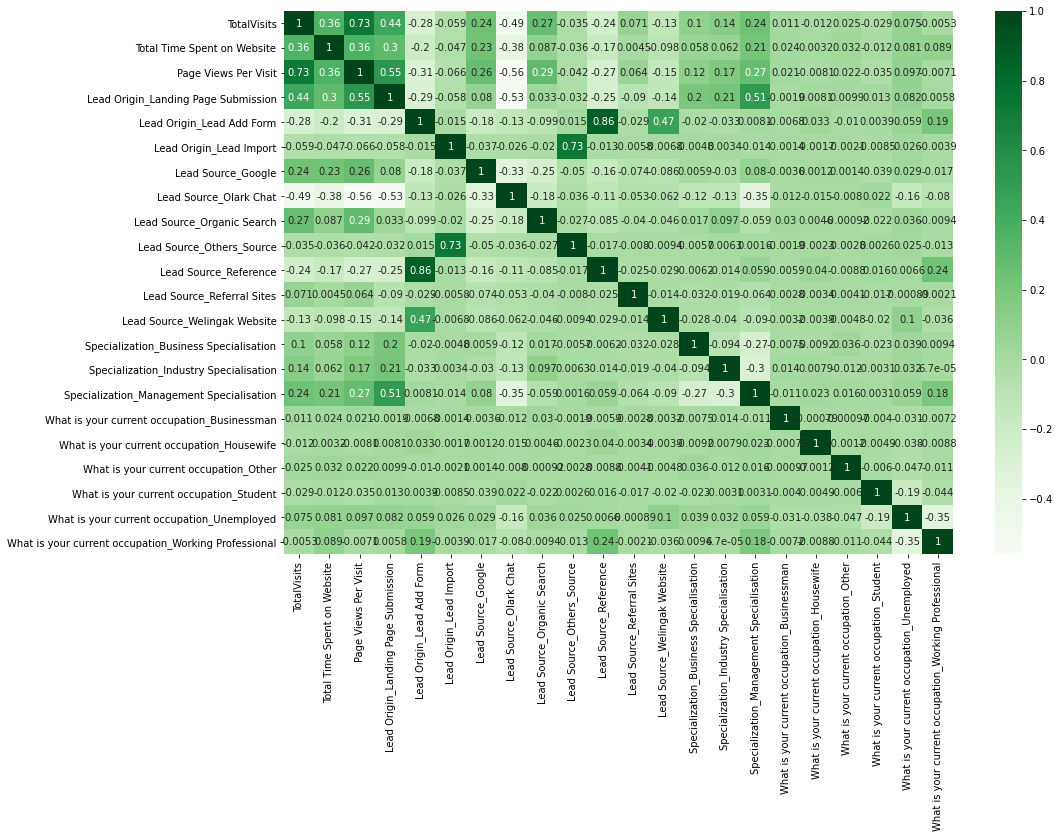

In [208]:
#plotting heatmap on the Train Dataset
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True,cmap="Greens")
plt.show()

- We do not have any highly corelated columns.

# Model Building

### RFE

In [209]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [210]:
# Running the RFE with variable equal to 15
logreg= LogisticRegression()
rfe= RFE(logreg, 15)
rfe= rfe.fit(X_train, y_train)

In [211]:
rfe.support_

array([False,  True, False,  True,  True, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [212]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Others_Source', False, 6),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Specialisation', True, 1),
 ('Specialization_Industry Specialisation', True, 1),
 ('Specialization_Management Specialisation', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupati

In [213]:
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Business Specialisation',
       'Specialization_Industry Specialisation',
       'Specialization_Management Specialisation',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [214]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others_Source', 'Lead Source_Referral Sites'],
      dtype='object')

### Building with StatsModels

In [215]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [216]:
# Puting the columns we get through RFE into 'col'
col= X_train.columns[rfe.support_]

In [217]:
# creating a function that builds our model, calculates the VIF, calculate the confusion matrix and accuracy score
def logreg_model(X_train_rfe):
    # adding constant
    X_train_sm= sm.add_constant(X_train_rfe)
    
    # model building
    logm= sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
    res= logm.fit()
    
    # Calculate the VIF
    vif= pd.DataFrame()
    vif['Features']= X_train_rfe.columns
    vif["VIF"]= [variance_inflation_factor(X_train_rfe.values,i) for i in range(len(X_train_rfe.columns))]
    vif['VIF']= round(vif['VIF'],2)
    vif= vif.sort_values(by= 'VIF', ascending=False)
    
    # Creating a dataframe with actual Lead and the predicted Probabilites
    y_train_pred= res.predict(X_train_sm)
    y_train_pred_final= pd.DataFrame({"Lead": y_train.values, "Lead_Prob": y_train_pred})
    y_train_pred_final["Prospect_ID"]= y_train.index
    
    # Creating a column 'predicted' with 1 if Lead_Prob > 0.5 else 0
    y_train_pred_final["predicted"]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x>0.5 else 0)
    
    # Creating a confusion matrix
    confusion_matrix= metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted)
    
    # Calculating the accuracy score
    accuracy_score= metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted)
    
    return res, vif, y_train_pred_final, confusion_matrix, accuracy_score

### Model:1

In [218]:
res_1, vif_1, y_train_pred_final_1, confusion_matrix_1, accuracy_score_1= logreg_model(X_train[col])
print(res_1.summary())
print('\n')
print(vif_1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.8
Date:                Sun, 08 Aug 2021   Deviance:                       5515.7
Time:                        17:39:35   Pearson chi2:                 6.32e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- We can see the P-value of `What is your current occupation_Housewife` is very high, we can drop the column.
- But before that lets check some metrices

In [219]:
# predicted Dataframe with Actual and predicted Leads with the lead probability
y_train_pred_final_1.head()

Lead  Lead_Prob  Prospect_ID  predicted
5425     1   0.690177         5425          1
8586     0   0.081825         8586          0
4631     0   0.253096         4631          0
4464     0   0.178338         4464          0
2058     0   0.056678         2058          0

In [220]:
# Confusion Matrix
confusion_matrix_1

array([[3412,  451],
       [ 792, 1549]], dtype=int64)

In [221]:
# Predicted     not_churn    churn
# Actual
# not_churn        3412      451
# churn            792       1549 

In [222]:
# Accuracy Score
accuracy_score_1

0.799645390070922

- So our accuracy score looks fine with 80% but we have some columns with high P-value (as mentioned above). So we will drop it first and check again.

In [223]:
# droping the column "What is your current occupation_Housewife"
col_2= col.drop('What is your current occupation_Housewife', 1)

### Model:2

In [224]:
res_2, vif_2, y_train_pred_final_2, confusion_matrix_2, accuracy_score_2= logreg_model(X_train[col_2])
print(res_2.summary())
print('\n')
print(vif_2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2765.7
Date:                Sun, 08 Aug 2021   Deviance:                       5531.4
Time:                        17:39:35   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- We can see the P-value of `Lead Source_Reference` is very high, we can drop the column.
- But before that lets check some metrices

In [225]:
# predicted Dataframe with Actual and predicted Leads with the lead probability
y_train_pred_final_2.head()

Lead  Lead_Prob  Prospect_ID  predicted
5425     1   0.690636         5425          1
8586     0   0.083288         8586          0
4631     0   0.252541         4631          0
4464     0   0.177557         4464          0
2058     0   0.058257         2058          0

In [226]:
# Confusion Matrix
confusion_matrix_2

array([[3412,  451],
       [ 796, 1545]], dtype=int64)

In [227]:
# Predicted     not_churn    churn
# Actual
# not_churn        3412      451
# churn            796       1545 

In [228]:
# Accuracy Score
accuracy_score_2

0.7990006447453256

- So our accuracy score looks fine with 80% but we have some columns with high P-value (as mentioned above). So we will drop it first and check again.

In [229]:
# droping the column "Lead Source_Reference"
col_3= col_2.drop('Lead Source_Reference', 1)

### Model:3

In [230]:
res_3, vif_3, y_train_pred_final_3, confusion_matrix_3, accuracy_score_3= logreg_model(X_train[col_3])
print(res_3.summary())
print('\n')
print(vif_3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2766.4
Date:                Sun, 08 Aug 2021   Deviance:                       5532.8
Time:                        17:39:36   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- We can see the VIF of `Lead Origin_Landing Page Submission` is high, we can drop the column.
- But before that lets check some metrices

In [231]:
# predicted Dataframe with Actual and predicted Leads with the lead probability
y_train_pred_final_3.head()

Lead  Lead_Prob  Prospect_ID  predicted
5425     1   0.690846         5425          1
8586     0   0.083347         8586          0
4631     0   0.252641         4631          0
4464     0   0.177603         4464          0
2058     0   0.058301         2058          0

In [232]:
# Confusion Matrix
confusion_matrix_3

array([[3410,  453],
       [ 795, 1546]], dtype=int64)

In [233]:
# Predicted     not_churn    churn
# Actual
# not_churn        3410      453
# churn            795       1546 

In [234]:
# Accuracy Score
accuracy_score_3

0.7988394584139265

- So our accuracy score looks fine with 79.8% but we have some columns with high P-value (as mentioned above). So we will drop it first and check again.

In [235]:
# droping the column "Lead Origin_Landing Page Submission"
col_4= col_3.drop('Lead Origin_Landing Page Submission', 1)

### Model:4

In [236]:
res_4, vif_4, y_train_pred_final_4, confusion_matrix_4, accuracy_score_4= logreg_model(X_train[col_4])
print(res_4.summary())
print('\n')
print(vif_4)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6191
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2794.2
Date:                Sun, 08 Aug 2021   Deviance:                       5588.4
Time:                        17:39:36   Pearson chi2:                 6.24e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- All our P-values and the VIF values are also in good range.
- So we can consider this as our final model.
- But before that lets check some mertrices.

In [237]:
# predicted Dataframe with Actual and predicted Leads with the lead probability
y_train_pred_final_4.head()

Lead  Lead_Prob  Prospect_ID  predicted
5425     1   0.721015         5425          1
8586     0   0.086765         8586          0
4631     0   0.268448         4631          0
4464     0   0.152049         4464          0
2058     0   0.061188         2058          0

In [238]:
# Confusion Matrix
confusion_matrix_4

array([[3436,  427],
       [ 847, 1494]], dtype=int64)

In [239]:
# Predicted     not_churn    churn
# Actual
# not_churn        3436      427
# churn            847       1494 

In [240]:
# Accuracy Score
accuracy_score_4

0.7946486137975499

So our accuracy score looks fine with 79.5% but we have some columns with all P-values in range. But lets check by droping the column "What is your current occupation_Businessman" and see if it maes any changeto our model and metrices.

In [241]:
# droping the column "What is your current occupation_Businessman"
col_5= col_4.drop('What is your current occupation_Businessman', 1)

### Model:5

In [242]:
res_5, vif_5, y_train_pred_final_5, confusion_matrix_5, accuracy_score_5= logreg_model(X_train[col_5])
print(res_5.summary())
print('\n')
print(vif_5)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6192
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2796.6
Date:                Sun, 08 Aug 2021   Deviance:                       5593.1
Time:                        17:39:37   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- All our P-values and the VIF values are also in good range.
- So we can consider this as our final model.
- But before that lets check some mertrices.

In [243]:
# predicted Dataframe with Actual and predicted Leads with the lead probability
y_train_pred_final_5.head()

Lead  Lead_Prob  Prospect_ID  predicted
5425     1   0.720928         5425          1
8586     0   0.087349         8586          0
4631     0   0.268072         4631          0
4464     0   0.152400         4464          0
2058     0   0.061821         2058          0

In [244]:
# Confusion Matrix
confusion_matrix_5

array([[3437,  426],
       [ 848, 1493]], dtype=int64)

In [245]:
# Predicted     not_churn    churn
# Actual
# not_churn        3437      426
# churn            848       1493 

In [246]:
# Accuracy Score
accuracy_score_5

0.7946486137975499

- Also we can see that our accuracy score did not change and it is a good score, we can stop here our model building here.

##### - Finally we have 11 number of columns and all our p-values and VIFs are in required range. 
##### - We have also done the prediction on y_train and got the confusion matrix and the Accuracy Score i.e 79.46%.
##### - So now lets do some more checks in our model, like Sensitivity, Specificity, False Positive Rate, Positive Predictive Value, Negative predictive value.

## Metrics Beyond Accuracy

In [247]:
TP= confusion_matrix_5[1,1] #true positive
TN= confusion_matrix_5[0,0] #true Negative
FP= confusion_matrix_5[0,1] #false positive
FN= confusion_matrix_5[1,0] #false Negative

In [248]:
# Sensitivity
print("Sensitivity: ", TP/(TP+FN))

Sensitivity:  0.6377616403246475


In [249]:
# Specificity
print("Specificity: ", TN/(TN+FP))

Specificity:  0.8897230132021745


In [250]:
# False Positive Rate
print("False Positive Rate: ", FP/(TN+FP))

False Positive Rate:  0.11027698679782552


In [251]:
# Positive Predictive Value
print("Positive Predictive Value: ", TP/(TP+FP))

Positive Predictive Value:  0.778009379885357


In [252]:
# Negative predictive value
print("Negative predictive value: ", TN/(TN+FN))

Negative predictive value:  0.802100350058343


- We can see that the `Specificity` is around 89% which is a good score.
- And the `Sensitivity` is around 64% which we have to take care.
- This might be because we have choosen the cut-off i.e 0.5 randomly.
- So to get a optimal cut-off we need a good Sensitivity rate. And for that we will prepare a ROC curve.

### Plotting the ROC Curve

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [253]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [254]:
fpr, tpr, thresholds= metrics.roc_curve(y_train_pred_final_5.Lead, y_train_pred_final_5.Lead_Prob, drop_intermediate=False)

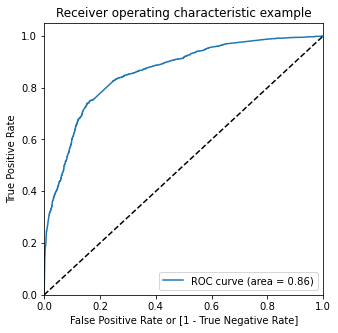

In [255]:
draw_roc(y_train_pred_final_5.Lead, y_train_pred_final_5.Lead_Prob)

- So we can see the ROC curve area to be as high as 86%. So we can consider it to be a good model.

## Finding the Optimal Cut-off

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [256]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_5[i]= y_train_pred_final_5.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_5.head()

Lead  Lead_Prob  Prospect_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
5425     1   0.720928         5425          1    1    1    1    1    1    1   
8586     0   0.087349         8586          0    1    0    0    0    0    0   
4631     0   0.268072         4631          0    1    1    1    0    0    0   
4464     0   0.152400         4464          0    1    1    0    0    0    0   
2058     0   0.061821         2058          0    1    0    0    0    0    0   

      0.6  0.7  0.8  0.9  
5425    1    1    0    0  
8586    0    0    0    0  
4631    0    0    0    0  
4464    0    0    0    0  
2058    0    0    0    0

In [257]:
from sklearn.metrics import confusion_matrix

In [258]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df= pd.DataFrame(columns= ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_5.Lead, y_train_pred_final_5[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377337  1.000000  0.000000
0.1   0.1  0.499194  0.987185  0.203469
0.2   0.2  0.699549  0.890218  0.584002
0.3   0.3  0.778369  0.827851  0.748382
0.4   0.4  0.801418  0.697138  0.864613
0.5   0.5  0.794649  0.637762  0.889723
0.6   0.6  0.776757  0.556173  0.910432
0.7   0.7  0.757253  0.458778  0.938131
0.8   0.8  0.738878  0.355404  0.971266
0.9   0.9  0.691651  0.191371  0.994823


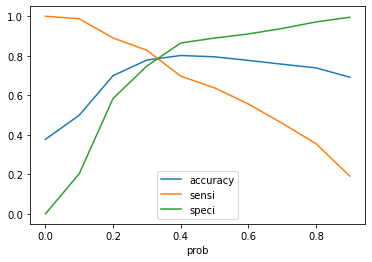

In [259]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- So from the above graph and the dataframe we can consider `0.3` to be the optimal cutoff for the model.

In [260]:
# applying the cutoff to the predicted dataframe
y_train_pred_final_5['Final_Predicted']= y_train_pred_final_5.Lead_Prob.map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final_5.head()

Lead  Lead_Prob  Prospect_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
5425     1   0.720928         5425          1    1    1    1    1    1    1   
8586     0   0.087349         8586          0    1    0    0    0    0    0   
4631     0   0.268072         4631          0    1    1    1    0    0    0   
4464     0   0.152400         4464          0    1    1    0    0    0    0   
2058     0   0.061821         2058          0    1    0    0    0    0    0   

      0.6  0.7  0.8  0.9  Final_Predicted  
5425    1    1    0    0                1  
8586    0    0    0    0                0  
4631    0    0    0    0                0  
4464    0    0    0    0                0  
2058    0    0    0    0                0

In [261]:
# Adding the "Lead Score" to our predicted model
y_train_pred_final_5['Lead_Score']= y_train_pred_final_5.Lead_Prob.map(lambda x: round(x*100))
y_train_pred_final_5.head()

Lead  Lead_Prob  Prospect_ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
5425     1   0.720928         5425          1    1    1    1    1    1    1   
8586     0   0.087349         8586          0    1    0    0    0    0    0   
4631     0   0.268072         4631          0    1    1    1    0    0    0   
4464     0   0.152400         4464          0    1    1    0    0    0    0   
2058     0   0.061821         2058          0    1    0    0    0    0    0   

      0.6  0.7  0.8  0.9  Final_Predicted  Lead_Score  
5425    1    1    0    0                1          72  
8586    0    0    0    0                0           9  
4631    0    0    0    0                0          27  
4464    0    0    0    0                0          15  
2058    0    0    0    0                0           6

# Model Evaluation

In [262]:
# Accuracy of the model
print("Accuracy: ", metrics.accuracy_score(y_train_pred_final_5.Lead, y_train_pred_final_5.Final_Predicted))

Accuracy:  0.7783687943262412


In [263]:
# confusion matrix
confusion_matrix_pred= metrics.confusion_matrix(y_train_pred_final_5.Lead, y_train_pred_final_5.Final_Predicted)
confusion_matrix_pred

array([[2891,  972],
       [ 403, 1938]], dtype=int64)

In [264]:
# Predicted     not_churn    churn
# Actual
# not_churn        2891      972
# churn            403       1938

In [265]:
TP= confusion_matrix_pred[1,1] #true positive
TN= confusion_matrix_pred[0,0] #true negative
FP= confusion_matrix_pred[0,1] #false positive 
FN= confusion_matrix_pred[1,0] #false negative

In [266]:
# Sensitivity
print("Sensitivity: ", TP/(TP+FN))

Sensitivity:  0.8278513455788125


In [267]:
# Specificity
print("Specificity: ", TN/(TN+FP))

Specificity:  0.7483820864612996


In [268]:
# False Positive rate
print("False Positive rate: ", FP/(TN+FP))

False Positive rate:  0.2516179135387005


In [269]:
# Positive Predictive Value
print("Positive Predictive Value: ", TP/(TP+FP))

Positive Predictive Value:  0.6659793814432989


In [270]:
# Negative Predictive Value
print("Negative Predictive Value: ", TN/(TN+FN))

Negative Predictive Value:  0.8776563448694596


- All our scores are now in acceptable value range and we can carry on with the model.

# Precision and Recall

- Precision: It is also known as "Positive Pedicted Values", i.e from all the predicted true values how many are actually true.
- Recall: It is also known "Sensitivity", i.e from all the actual ture values how many were predicted.

In [271]:
from sklearn.metrics import precision_score, recall_score

In [272]:
print("Precision: ", precision_score(y_train_pred_final_5.Lead, y_train_pred_final_5.predicted))

Precision:  0.778009379885357


In [273]:
print("Recall: ", recall_score(y_train_pred_final_5.Lead, y_train_pred_final_5.predicted))

Recall:  0.6377616403246475


### Precision Recall Trade off

In [274]:
from sklearn.metrics import precision_recall_curve

In [275]:
y_train_pred_final_5.Lead, y_train_pred_final_5.predicted

(5425    1
 8586    0
 4631    0
 4464    0
 2058    0
        ..
 381     0
 85      0
 8393    0
 7232    0
 5878    0
 Name: Lead, Length: 6204, dtype: int64,
 5425    1
 8586    0
 4631    0
 4464    0
 2058    0
        ..
 381     0
 85      0
 8393    1
 7232    0
 5878    0
 Name: predicted, Length: 6204, dtype: int64)

In [276]:
p, r, thresholds= precision_recall_curve(y_train_pred_final_5.Lead, y_train_pred_final_5.Lead_Prob)

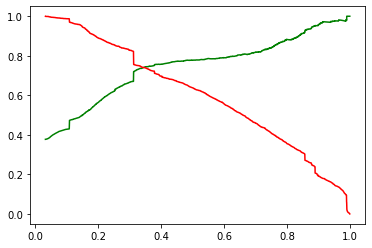

In [277]:
# ploting the curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- This curve gives a trade off between the precision and recall where both the values are high, and that is the cut off point for the model. So we can see the cutoff value is approximately 0.3, we have taken the correct value of the cutoff.

# Making Predictions on the Test data

In [278]:
X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]= scaler.transform(X_test[["TotalVisits", 
                                                            "Total Time Spent on Website", "Page Views Per Visit"]])

In [279]:
X_test= X_test[col_5]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
8788                     1.647288                          0   
7813                    -0.402525                          0   
2403                     1.733538                          0   
7243                     1.203193                          0   
5363                     2.067527                          0   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
8788                       0                             0   
7813                       0                             0   
2403                       0                             0   
7243                       0                             0   
5363                       0                             0   

      Specialization_Business Specialisation  \
8788                                       0   
7813                                       1   
2403                                       0   
7243                                       0   
5363                                       0   

      Specialization_Industry Specialisation  \
8788                                       0   
7813                                       0   
2403                                       0   
7243                                       0   
5363                                       0   

      Specialization_Management Specialisation  \
8788                                         1   
7813                                         0   
2403                                         1   
7243                                         0   
5363                                         1   

      What is your current occupation_Other  \
8788                                      0   
7813                                      0   
2403                                      0   
7243                                      0   
5363                                      0   

      What is your current occupation_Student  \
8788                                        0   
7813                                        0   
2403                                        0   
7243                                        0   
5363                                        0   

      What is your current occupation_Unemployed  \
8788                                           1   
7813                                           1   
2403                                           1   
7243                                           1   
5363                                           1   

      What is your current occupation_Working Professional  
8788                                                  0     
7813                                                  0     
2403                                                  0     
7243                                                  0     
5363                                                  0

In [280]:
X_test_sm= sm.add_constant(X_test)

y_test_pred= res_5.predict(X_test_sm)
y_test_pred[:10]

8788    0.744159
7813    0.230174
2403    0.762423
7243    0.566371
5363    0.824437
3918    0.637283
3345    0.107647
917     0.036718
7732    0.036496
1702    0.052323
dtype: float64

In [281]:
y_pred_1= pd.DataFrame(y_test_pred)
y_pred_1.head()

0
8788  0.744159
7813  0.230174
2403  0.762423
7243  0.566371
5363  0.824437

In [282]:
y_test_df= pd.DataFrame(y_test)
y_test_df['Prospect_ID']= y_test_df.index
y_test_df.head()

Converted  Prospect_ID
8788          0         8788
7813          0         7813
2403          1         2403
7243          1         7243
5363          1         5363

In [283]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [284]:
y_pred_final= pd.concat([y_test_df,y_pred_1], axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})
y_pred_final.head()

Converted  Prospect_ID  Lead_Prob
0          0         8788   0.744159
1          0         7813   0.230174
2          1         2403   0.762423
3          1         7243   0.566371
4          1         5363   0.824437

In [285]:
y_pred_final["Final_Predicted"]= y_pred_final.Lead_Prob.map(lambda x: 1 if x>0.3 else 0)
y_pred_final.head()

Converted  Prospect_ID  Lead_Prob  Final_Predicted
0          0         8788   0.744159                1
1          0         7813   0.230174                0
2          1         2403   0.762423                1
3          1         7243   0.566371                1
4          1         5363   0.824437                1

In [286]:
# Accuracy
print("Accuracy: ", metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

Accuracy:  0.7638209853328319


In [287]:
# Confusion Matrix
confusion_final= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion_final

array([[1220,  429],
       [ 199,  811]], dtype=int64)

In [288]:
TP = confusion_final[1,1] #true positive 
TN = confusion_final[0,0] #true negatives
FP = confusion_final[0,1] #false positives
FN = confusion_final[1,0] #false negatives

In [289]:
# Sensitivity
print("Sensitivity: ", TP/(TP+FN))

Sensitivity:  0.802970297029703


In [290]:
# Specificity
print("Specificity: ", TN/(TN+FP))

Specificity:  0.739842328684051


#### Assign Lead Score to the test data

In [291]:
y_pred_final["Lead_Score"]= y_pred_final.Lead_Prob.map(lambda x: round(x*100))
y_pred_final.head()

Converted  Prospect_ID  Lead_Prob  Final_Predicted  Lead_Score
0          0         8788   0.744159                1          74
1          0         7813   0.230174                0          23
2          1         2403   0.762423                1          76
3          1         7243   0.566371                1          57
4          1         5363   0.824437                1          82

## Results
#### Train Data:
- Accuracy:  77.83
- Sensitivity:  82.78
- Specificity:  74.83

#### Test Data:
- Accuracy:  76.38
- Sensitivity:  80.29
- Specificity:  73.98

So as we can see that the difference between the 3 metrices is very less, that means it is working good on the test data.
As our Sensitivity is around 80%, we have a model that predicts 80% of the leads, which is our requirement.

#### Leads to be contacted (high Lead Score)

In [292]:
# the students who have Lead_Score more than or equal to 85 are our Hot Leads and to be contacted for the lead conversion
hot_leads= y_pred_final[y_pred_final["Lead_Score"]>=85]
hot_leads

Converted  Prospect_ID  Lead_Prob  Final_Predicted  Lead_Score
18            1         6423   0.988829                1          99
19            0          809   0.989467                1          99
21            1         4295   0.894999                1          89
28            1           76   0.880249                1          88
37            1         8547   0.856392                1          86
...         ...          ...        ...              ...         ...
2634          1         4795   0.932868                1          93
2638          1         2126   0.888952                1          89
2640          1         2598   0.985912                1          99
2648          0         1525   0.907860                1          91
2654          1         1932   0.850046                1          85

[338 rows x 5 columns]

- So there are 338 students that can be contacted for the lead conversion. 

### Features

In [293]:
res_5.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.892695
What is your current occupation_Working Professional    3.785762
Lead Source_Welingak Website                            2.697559
What is your current occupation_Other                   1.832974
What is your current occupation_Unemployed              1.323191
Lead Source_Olark Chat                                  1.315248
Total Time Spent on Website                             1.139843
What is your current occupation_Student                 1.030710
Specialization_Industry Specialisation                  0.394700
Specialization_Business Specialisation                  0.355880
Specialization_Management Specialisation                0.294439
const                                                  -2.427582
dtype: float64

## Conclusion and Recomendations

- All our features have a positive impact on the lead conversion with different proportions.
- The sales team <b>should contact</b> the leads coming from `Lead Origin_Lead Add Form`, `What is your current occupation_Working Professional`and `Lead Source_Welingak Website` first which have a high proportion of impact on the lead conversion.
- The sales team <b>should contact</b> the leads coming from `What is your current occupation_Other`, `What is your current occupation_Unemployed`, `Lead Source_Olark Chat`, `Total Time Spent on Website`, `What is your current occupation_Student` on a second priority.
- And the leads coming from `Specialization_Industry Specialisation`, `Specialization_Business Specialisation` and `Specialization_Management Specialisation` on next priority for converting the leads.